In [1]:
import csv
import numpy as np
import pandas as pd

file_name = '../data/artwork_transactions_sample.csv'
artwork_transactions = pd.read_csv(file_name)


In [2]:
def find_out_lables(column):
    lables = []
    for value in column:
        if value not in lables:
            lables.append(value)
    print(lables)
    return lables


# find_out_lables(artwork_transactions['trans_category'])
# find_out_lables(artwork_transactions['trans_art_type'])
# find_out_lables(artwork_transactions['auction_id'])
# find_out_lables(artwork_transactions['company_id'])

In [3]:

#drop column with no info

artwork_transactions.drop(['auction_info_link'],axis=1,inplace=True)
artwork_transactions.drop(['collector'],axis=1,inplace=True)
artwork_transactions.drop(['sell_agency'],axis=1,inplace=True)
artwork_transactions.drop(['image_url'],axis=1,inplace=True)
artwork_transactions.drop(['icon_img_url'],axis=1,inplace=True)
artwork_transactions.drop(['search_string'],axis=1,inplace=True)

artwork_transactions.drop(['eval_price_curr'],axis=1,inplace=True)        #information in eval_price
artwork_transactions.drop(['trade_curr'],axis=1,inplace=True)             #only one value
artwork_transactions.drop(['comments_count'],axis=1,inplace=True) 
artwork_transactions.drop(['likes_count'],axis=1,inplace=True) 


#删除‘未提供’价格的 row

artwork_transactions = artwork_transactions[artwork_transactions.display_price != '未提供']
artwork_transactions = artwork_transactions.reset_index()

In [5]:
#category fill nan

artwork_transactions['trans_category']=artwork_transactions['trans_category'].fillna('unclear')


        
#make new column artist

artist_artworktransaction_dic = pd.read_csv('../data/artist_artworktransaction.csv')
artwork_transactions['artist'] = range(len(artwork_transactions))
for i in range(len(artwork_transactions)):
    artwork_transactions['artist'][i] = artist_artworktransaction_dic.artist_id[artist_artworktransaction_dic.artwork_transaction_id == artwork_transactions.id[i]]
        


/Users/eva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [6]:
# about time form transform
import datetime
import time

def texts_to_dates(texts):
    dates = []
    for text in texts:
        date = datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S').date()
        dates.append(date)
    return dates


def texts_to_strptime(texts):
    counter =0
    dates = np.array(range(len(texts)))
    for text in texts:
        date = datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S').date()
        date_s = time.mktime(date.timetuple())
        #print(dates[counter])
        dates[counter] = date_s
        #print (dates[:10])
        counter +=1
    #print(dates)
    return dates

def get_age_days(date1s,date2s):
    age_days=[]
    for i in range(len(date1s)):
        age_days.append((date1s[i] - date2s[i]).days)
    return age_days


artwork_transactions['transaction_date'] = texts_to_strptime(artwork_transactions.transaction_date)
artwork_transactions['transaction_date'] = (artwork_transactions['transaction_date'])



In [7]:
# about price
exchange_rate = {'USD':0.15831, 
                 'HKD':1.23757036, 
                 'RMB':1, 
                 'NTD':4.60471204,
                 'SGD':0.207030484,
                 'GBP':0.111719583,
                 'EUR':0.127391969
                }

eval_price = []
eval_price_min = []
eval_price_max = []
for ii, price in enumerate(artwork_transactions['eval_price']):
    if ii % 500 == 0: print(ii)
        

    if pd.isnull(price): 
        eval_price.append(0)
        eval_price_min.append(0)
        eval_price_max.append(0)
    else:
        price = price.split(' ')
        price[1] = (price[1].strip('\u3000')).split('-')
        try:
            price_min = int(price[1][0].replace(',',''))/(exchange_rate[price[0]])
        except ValueError: 
            print(price)
            price_min = 0
            
        try:
            price_max = int(price[1][1].replace(',',''))/(exchange_rate[price[0]])
        except ValueError: 
            print(price)
            price_max = 0
        
        eval_price.append(price)
        eval_price_min.append(price_min)
        eval_price_max.append(price_max)

        
artwork_transactions['eval_price_min'] = (eval_price_min)
artwork_transactions['eval_price_max'] = (eval_price_max)
artwork_transactions['eval_price'] = (artwork_transactions['eval_price_max'] + artwork_transactions['eval_price_min'])/2
    




0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


In [8]:
artwork_transactions['calc_price'] = artwork_transactions['calc_price'].fillna(0)
artwork_transactions = artwork_transactions[artwork_transactions.calc_price != 0]
artwork_transactions = artwork_transactions.reset_index()

## 统计分析

In [9]:
artwork_transactions.head()

,level_0,index,id,trans_type,display_price,calc_price,eval_price,eval_price_min,eval_price_max,trans_category,...,info_update_time,trade_channel_id,origin_url,created_at,updated_at,transaction_date,lot,auction_id,company_id,artist
0,3,3,1085516,auction,"RMB 22,600",22600.0,25000.0,20000.0,30000.0,书法,...,2015-07-11 14:19:01,13270,http://auction.artron.net/paimai-art5036120262/,2013-07-09 00:00:00,2013-07-09 00:00:00,1373212800,0262,1824,316,20339
1,5,5,1869583,auction,"RMB 168,000",168000.0,40000.0,30000.0,50000.0,绘画,...,2015-07-12 23:21:23,7348,http://auction.artron.net/paimai-art65370522/,2010-06-05 00:00:00,2010-06-05 00:00:00,1275580800,0522,203,67,104179
2,8,11,1650671,auction,"RMB 8,800",8800.0,7000.0,6000.0,8000.0,书法,...,2015-07-12 19:19:33,1837,http://auction.artron.net/paimai-art88510467/,2009-01-07 00:00:00,2009-01-07 00:00:00,1231171200,0467,1435,200,106284
3,9,12,2244599,auction,"RMB 39,200",39200.0,33000.0,28000.0,38000.0,绘画,...,2015-07-13 20:26:42,8112,http://auction.artron.net/paimai-art62610528/,2009-12-19 00:00:00,2009-12-19 00:00:00,1261065600,0528,765,72,24942
4,11,14,2194085,auction,"RMB 20,430",20430.0,21500.0,18000.0,25000.0,书法,...,2015-07-13 18:06:41,13795,http://auction.artron.net/paimai-art0017824473/,2012-12-02 00:00:00,2012-12-02 00:00:00,1354291200,4473,535,89,88001


In [10]:
artwork_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5192 entries, 0 to 5191
Data columns (total 22 columns):
level_0                 5192 non-null int64
index                   5192 non-null int64
id                      5192 non-null int64
trans_type              5192 non-null object
display_price           5192 non-null object
calc_price              5192 non-null float64
eval_price              5192 non-null float64
eval_price_min          5192 non-null float64
eval_price_max          5192 non-null float64
trans_category          5192 non-null object
trans_art_type          5192 non-null object
artwork_auction_name    5192 non-null object
info_update_time        5190 non-null object
trade_channel_id        5192 non-null int64
origin_url              5192 non-null object
created_at              5192 non-null object
updated_at              5192 non-null object
transaction_date        5192 non-null int64
lot                     5192 non-null object
auction_id              5192 non-null i

#### 估价的分布

艺术品估价的分布（事实上成交价格也是一样），呈现完全的倾斜状态，估价和成交价是完全相关的！我之后会先试着使用 估价 这一feature，看看能达到的准确度，但是最终的模型我并不使用估价。

In [11]:
print (len(artwork_transactions))
print (len(artwork_transactions[artwork_transactions.eval_price < 10000]))
print (len(artwork_transactions[artwork_transactions.eval_price > 1000000]))


5192
1673
110


(array([ 1673.,   777.,   508.,   323.,   278.,   190.,   159.,   139.,
           51.,   183.]),
 array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
          60000.,   70000.,   80000.,   90000.,  100000.]),
 <a list of 10 Patch objects>)

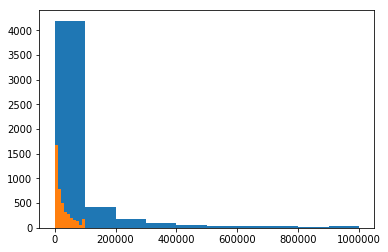

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 


plt.hist(artwork_transactions['eval_price'], range = (0,1000000))
plt.hist(artwork_transactions['eval_price'], range = (0,100000))


#### 艺术家 和售价

艺术家和售价一定有关系的呢~

In [13]:
def count_lables(column):
    lables = []
    for value in column:
        if value not in lables:
            lables.append(value)
    return len(lables)

count_lables(artwork_transactions['artist'])

2366

(array([ 1863.,   224.,    91.,    45.,    23.,    26.,    16.,     4.,
            7.,     9.]),
 array([       0.,   100000.,   200000.,   300000.,   400000.,   500000.,
          600000.,   700000.,   800000.,   900000.,  1000000.]),
 <a list of 10 Patch objects>)

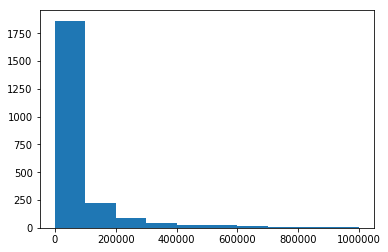

In [14]:
artist_price = artwork_transactions.groupby(['artist'])['calc_price'].mean()
plt.hist(artist_price,range = (0,1000000))


#### 艺术品的类型 和品种

#### 艺术品类型 * 色彩？

#### 艺术品的类型 * name

#### 拍卖公司 和 拍卖会

首先，拍卖公司也许是相关的。

而拍卖会，平均每次拍卖会的艺术品也是小于十件，样本量过小。再次，待预测的艺术品一定来自于新的拍卖会，在最终的预测中是没有用的。

## 准备塞进分类器


In [15]:
from sklearn import preprocessing
def scale(data):
    X_train = data
    X_scaled = preprocessing.scale(X_train)

    return X_scaled                                          


In [16]:
def sperate_train_data(data):
    the_num_of_total_data = len(data)
    data_train = data[:int(the_num_of_total_data * 0.8)]
    data_test = data[int(the_num_of_total_data * 0.8):]
    return data_train, data_test

#feature_train, feature_test = sperate_train_data(feature_matric)

In [17]:
attrib = [
          'trans_cantegory',
          'trans_art_type',
          'transaction_date',
          'company_id',
          'artist']

In [18]:
artwork_transactions.drop(['lot'],axis=1,inplace=True)
artwork_transactions.drop(['updated_at'],axis=1,inplace=True)
artwork_transactions.drop(['created_at'],axis=1,inplace=True)
artwork_transactions.drop(['origin_url'],axis=1,inplace=True)
artwork_transactions.drop(['trade_channel_id'],axis=1,inplace=True)
artwork_transactions.drop(['info_update_time'],axis=1,inplace=True)
artwork_transactions.drop(['artwork_auction_name'],axis=1,inplace=True)
artwork_transactions.drop(['display_price'],axis=1,inplace=True)
artwork_transactions.drop(['trans_type'],axis=1,inplace=True)
artwork_transactions.drop(['id'],axis=1,inplace=True)
artwork_transactions.drop(['index'],axis=1,inplace=True)
artwork_transactions.drop(['level_0'],axis=1,inplace=True)

artwork_transactions.drop(['eval_price_min'],axis=1,inplace=True)
artwork_transactions.drop(['eval_price_max'],axis=1,inplace=True)
artwork_transactions.drop(['eval_price'],axis=1,inplace=True)
artwork_transactions.drop(['auction_id'],axis=1,inplace=True)



calc_price = artwork_transactions['calc_price']
artwork_transactions.drop(['calc_price'],axis=1,inplace=True)


In [19]:
artwork_transactions.head()

,trans_category,trans_art_type,transaction_date,company_id,artist
0,书法,中国书画,1373212800,316,20339
1,绘画,中国书画,1275580800,67,104179
2,书法,中国书画,1231171200,200,106284
3,绘画,中国书画,1261065600,72,24942
4,书法,中国书画,1354291200,89,88001


In [20]:
category_attrib = ['trans_category', 'trans_art_type', 'company_id', 'artist']

In [21]:

artwork_transactions['company_id'] = artwork_transactions['company_id'].astype(str)
artwork_transactions['artist'] = artwork_transactions['artist'].astype(str)

In [22]:
serial_attrib = ['transaction_date']

In [23]:
#artwork_transactions['eval_price'] = scale(artwork_transactions['eval_price'])
artwork_transactions['transaction_datee'] = scale(artwork_transactions['transaction_date'])

/Users/eva/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/eva/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [24]:
columns = []
for column_name in artwork_transactions:
    columns.append(artwork_transactions[column_name])

feature_tuple = list(zip(*columns))
feature_dic = [{k: v for k,v in zip(attrib, d)} for d in feature_tuple]

In [25]:
feature_dic

[{'artist': '20339',
  'company_id': '316',
  'trans_art_type': '中国书画',
  'trans_cantegory': '书法',
  'transaction_date': 1373212800},
 {'artist': '104179',
  'company_id': '67',
  'trans_art_type': '中国书画',
  'trans_cantegory': '绘画',
  'transaction_date': 1275580800},
 {'artist': '106284',
  'company_id': '200',
  'trans_art_type': '中国书画',
  'trans_cantegory': '书法',
  'transaction_date': 1231171200},
 {'artist': '24942',
  'company_id': '72',
  'trans_art_type': '中国书画',
  'trans_cantegory': '绘画',
  'transaction_date': 1261065600},
 {'artist': '88001',
  'company_id': '89',
  'trans_art_type': '中国书画',
  'trans_cantegory': '书法',
  'transaction_date': 1354291200},
 {'artist': '9365',
  'company_id': '225',
  'trans_art_type': '中国书画',
  'trans_cantegory': '绘画',
  'transaction_date': 1325779200},
 {'artist': '33138',
  'company_id': '133',
  'trans_art_type': '中国书画',
  'trans_cantegory': '绘画',
  'transaction_date': 1434556800},
 {'artist': '90385',
  'company_id': '84',
  'trans_art_type': '

In [26]:
from sklearn.feature_extraction import DictVectorizer
victorizer = DictVectorizer(sparse = True)
feature_matric = victorizer.fit_transform(feature_dic)
feature_matric = feature_matric.toarray()

In [27]:
feature_matric

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.37321280e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.27558080e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.23117120e+09],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.31428800e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.21432320e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.38634560e+09]])

In [28]:
label_train, label_test = sperate_train_data(calc_price)
feature_train, feature_test = sperate_train_data(feature_matric)

#label_test = label_test.reset_index()

label = calc_price
feature = feature_matric

In [29]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeRegressor()#(min_samples_split= 400)
dt = dt.fit(feature_train, label_train)
pred_dt = dt.predict(feature_test)


In [30]:
print(len(label_test),len(feature_test))
print(len(label),len(feature))

1039 1039
5192 5192


In [31]:
dt.score(feature_test, label_test)

-0.032772757463029434

In [32]:
importances = dt.feature_importances_
print(importances.argsort())

[   0 1399 1398 ..., 2828 2321 1176]


In [33]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb = gnb.fit(feature_train, label_train)
# pred_gnb = gnb.predict(feature_test)
# pred2_gnb = gnb.predict(feature_train)
# print(accuracy_score(label_test, pred_gnb), accuracy_score(label_train, pred2_gnb))